In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from capt_gen import capt_gen, capt_decode
from model import Model

In [2]:
tf.reset_default_graph()
sess = tf.Session(config=tf.ConfigProto(device_count={'GPU': 0}))

model_path = './output/model'
ckpt_path = tf.train.latest_checkpoint(model_path)
meta_graph_path = ckpt_path + '.meta'
print(ckpt_path)

saver = tf.train.import_meta_graph(meta_graph_path)
saver.restore(sess, ckpt_path)

graph = tf.get_default_graph()

./output/model/model.ckpt-14000
INFO:tensorflow:Restoring parameters from ./output/model/model.ckpt-14000


In [3]:
x_ph = graph.get_tensor_by_name('test_inputs/x_ph:0')
y_ph = graph.get_tensor_by_name('test_inputs/y_ph:0')

preds = graph.get_tensor_by_name('test_eval/preds:0')
acc = graph.get_tensor_by_name('test_eval/acc:0')
acc_ = graph.get_tensor_by_name('test_eval/acc_:0')

x_ph, y_ph, preds, acc, acc_

(<tf.Tensor 'test_inputs/x_ph:0' shape=(?, 64, 128, 3) dtype=float32>,
 <tf.Tensor 'test_inputs/y_ph:0' shape=(?, 4) dtype=int64>,
 <tf.Tensor 'test_eval/preds:0' shape=(?, 4) dtype=int64>,
 <tf.Tensor 'test_eval/acc:0' shape=() dtype=float32>,
 <tf.Tensor 'test_eval/acc_:0' shape=() dtype=float32>)

acc: 95.31	 acc_: 98.83	 



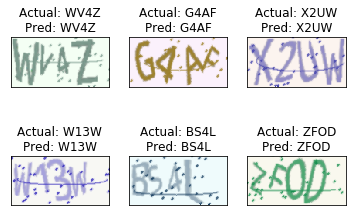

In [9]:
capt = capt_gen(batch_size=128)
tx, ty = next(capt)

feed_dict = {x_ph: tx, y_ph: ty}
temp_preds, temp_acc, temp_acc_ = sess.run([preds, acc, acc_], feed_dict=feed_dict)
print('acc: %.2f\t' % (temp_acc*100), 'acc_: %.2f\t' % (temp_acc_*100), '\n')


n_rows = 2
n_cols = 3
for i in range(n_cols*n_rows):
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(tx[i])
    plt.title('Actual: ' + capt_decode(ty[i]) + '\nPred: ' + capt_decode(temp_preds[i]))
    
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
plt.show()